<a href="https://colab.research.google.com/github/KhunBenya/Coursera_Capstone/blob/main/Finding_an_optimal_location_to_open_a_Thai_massage_%26_spa_in_North_Jersey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - Finding an optimal location to open a Thai massage & spa in North Jersey
## IBM Applied Data Science Capstone

## Table of contents
* [Business Problem](#introduction)
* [Data Acquisition](#data)
* [Exploratory Data Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Business Problem <a name="introduction"></a>

The project aims to demonstrate how Data Science can leverage decision making in starting a business. Coming up with the question “ If an entrepreneur is trying to open a Thai massage and spa business, where would you recommend him/her?

When deciding on a location for the massage and spa, there are a lot of factors to consider— traffic patterns, parking, public transportation, competitors, population density, surrounding businesses, neighborhood ambiance, zoning and rent. 

New Jersey is the fourth-smallest state by area but the 11th-most populous, with 8,882,190 residents as of 2019 and an area of 8,722.58 square miles, making it the most densely populated of the 50 U.S. states. The highest population density can reasonably lead to driving traffic to the business and sharing data of venues in cities. In case of the project, these would potentially benefit both the entrepreneur and the use of data analysis.
However, to make the scope of the interesting region smaller, this project will choose a region of New Jersey which is often broadly divided into North Jersey, Central Jersey, and South Jersey. Consequently, North Jersey becomes our choice due to a high level of economic output and its location, connecting to Upper Manhattan in New York City.

Therefore, the goal of the project is to recommend an optimal location related to the factors to an entrepreneur planning to open a Thai massage and spa business in the North Jersey region. 

## Data Acquisition <a name="data"></a>

Based on the business problem, factors that will influence the decission are:

*   The population density and median household income to drive high traffic of the business
*   The number of existing competitors in the neighborhood to avoid a high competitive situation
*   The most common venues of the cities and boroughs to estimate surrounding businesses and neighborhood ambiance.

Due to the factors, we need to get more data as following:

*   To obtain the the latest available data of all the counties in North Jersey, demographic data such as population, median household income and races from different sources, needs to combine to set up tables.
*   To create choropleth maps, the GeoJSON files use spatial data is of counties in New Jersey developed by the NJ Office of Information Technology and City of Newark Open Data Portal.
*   The coordinate of candidate cities and boroughs in the selected county will be obtained using **ArcGIS API**. The ArcGIS API for Python is a powerful, modern and easy to use Pythonic library to perform GIS visualization and analysis, spatial data management and GIS system administration.
*   **Foursquare API** is used to explore competitors and surrounding businesses in the cities and boroughs.


Visualizing the Counties in North Jersey

Let's create latitude & longitude coordinates for centroids of the counties. 

The dataframe was gathered from several sources of data and a geojson file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install folium
import folium

In [ ]:
nj_county_data =  pd.read_csv('https://raw.githubusercontent.com/KhunBenya/Data_IBM_DS_class/main/nj_pop_data.csv')
nj_county_data

,county,county_pop,county_latitude,county_longitude
0,Bergen,930390,40.961215,-74.077976
1,Middlesex,825920,40.438985,-74.411975
2,Essex,795404,40.786939,-74.246732
3,Hudson,670046,40.738277,-74.080289
4,Monmouth,621659,40.260082,-74.221906
5,Ocean,596415,39.884161,-74.281041
6,Union,554033,40.660113,-74.307995
7,Camden,506738,39.803544,-74.959658
8,Passaic,503637,41.086557,-74.304419
9,Morris,493379,40.861976,-74.544601


In [ ]:
# Creating the map of New Jersey
nj_county_map = folium.Map(location=[39.833851, -74.871826], zoom_start=8)

# Adding markers to map
for latitude, longitude, county in zip(nj_county_data['county_latitude'], nj_county_data['county_longitude'], nj_county_data['county']):
    label = '{}'.format(county)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [latitude, longitude],
        popup=label
        ).add_to(nj_county_map)  
    
nj_county_map

In [ ]:
north_county = nj_county_data.iloc[[0,2,3,6,8,9,16,18]].reset_index()
north_county

,index,county,county_pop,county_latitude,county_longitude
0,0,Bergen,930390,40.961215,-74.077976
1,2,Essex,795404,40.786939,-74.246732
2,3,Hudson,670046,40.738277,-74.080289
3,6,Union,554033,40.660113,-74.307995
4,8,Passaic,503637,41.086557,-74.304419
5,9,Morris,493379,40.861976,-74.544601
6,16,Sussex,141483,41.139194,-74.690906
7,18,Warren,105862,40.891465,-74.987800


In [ ]:
# Creating the map of New Jersey
north_county_map = folium.Map(location=[39.833851, -74.871826], zoom_start=8)

# Adding markers to map
for latitude, longitude, county in zip(north_county['county_latitude'], north_county['county_longitude'], north_county['county']):
    label = '{}'.format(county)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        [latitude, longitude],
        popup=label,
        ).add_to(north_county_map)  
    
north_county_map

## Exploratory Data Analysis <a name="analysis"></a>

As can be seen, the north region of NJ connects to Manhattan in New York City, area of businesses and financial centers. Moreover, North Jersey has a high level of economic output so that this region becomes our choice. North Jersey consists of 8 counties.

Let's explore which county should be our interesting choice for the business by considering the populations and median household incomes.

There are 3 counties namely Bergen, Morris and Sussex that their median household income is above the state's one. The bar plots show that Bergen county has the highest population. Due to the factors, we choose Bergen county to explore our location.

In [ ]:
north_nj =  pd.read_csv('https://raw.githubusercontent.com/KhunBenya/Data_IBM_DS_class/main/north_jersey.csv')
north_nj

,north_jersey,county_pop,state_pop,%pop,median_household_income,state_median_household_income,county>state,race_white,race_hispanic,race_black,race_asian
0,Bergen County,930390,8882190,10.47,101144,85751,1,56.6,19.9,NaN,16.2
1,Essex County,795404,8882190,8.96,61510,85751,0,30.5,23.0,38.4,NaN
2,Hudson County,670046,8882190,7.54,71189,85751,0,28.8,43.1,NaN,15.0
3,Union County,554033,8882190,6.24,80198,85751,0,39.5,31.6,20.1,NaN
4,Passaic County,503637,8882190,5.67,69688,85751,0,41.3,41.5,10.4,NaN
5,Morris County,493379,8882190,5.55,115527,85751,1,71.4,13.3,NaN,10.3
6,Sussex County,141483,8882190,1.59,94520,85751,1,86.3,8.2,2.1,NaN
7,Warren County,105862,8882190,1.19,81307,85751,0,81.7,9.3,4.4,NaN


Text(0.5, 1.0, 'Median Household Income of North Jersey by County')

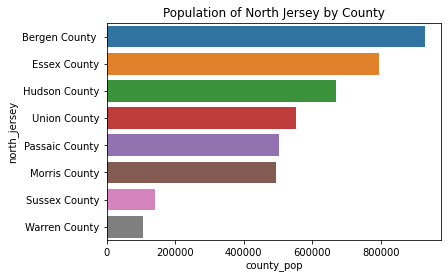

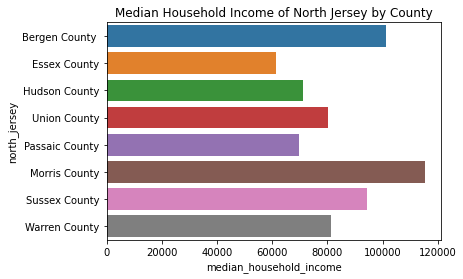

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(y = 'north_jersey', x = 'county_pop', data = north_nj).set_title('Population of North Jersey by County')
plt.figure(figsize=(6,4))
sns.barplot(y = 'north_jersey', x = 'median_household_income', data = north_nj).set_title('Median Household Income of North Jersey by County')

There are 67 cities in Bergen county. We only choose cities where the population is more than 10,000. Here is the 37 cities as the result.

In [ ]:
bergen_cities = pd.read_csv('https://raw.githubusercontent.com/KhunBenya/Data_IBM_DS_class/main/bergen_37cities.csv')
bergen_cities

,zip_code,city_or_borough,population>10000
0,7601,Hackensack,43010
1,7666,Teaneck,39776
2,7024,Fort Lee,35353
3,7410,Fair Lawn,32457
4,7026,Garfield,30555
5,7631,Englewood,27119
6,7621,Bergenfield,26761
7,7652,Paramus,26342
8,7430,Mahwah,25890
9,7450,Ridgewood,24958


In [ ]:
bergen_cities.shape

(37, 3)

In [ ]:
!pip install arcgis

In [ ]:
!pip install geocoder

In [ ]:
!pip install geopy

In [ ]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode, reverse_geocode
from arcgis.geometry import Point
gis = GIS()
import geocoder

Now we will use the ArcGIS API to get the latitude and longitude for the cities in Bergen county. 

In [ ]:
def get_x_y_nj(address1):
    lat_coords = 0
    lng_coords = 0
    g = geocode(address='{}, Bergen, NJ, USA'.format(address1))[0]
    lng_coords = g['location']['x']
    lat_coords = g['location']['y']
    return lat_coords, lng_coords

In [ ]:
coordinates_latlng_nj = bergen_cities['city_or_borough'].apply(lambda x: get_x_y_nj(x))

In [ ]:
bergen_cities['latitude'] = [float(val[0]) for val in coordinates_latlng_nj]
bergen_cities['longitude'] = [float(val[1]) for val in coordinates_latlng_nj]

The dataframe is ready to visualize the cities on a map.

In [ ]:
bergen_cities

,zip_code,city_or_borough,population>10000,latitude,longitude
0,7601,Hackensack,43010,40.88617,-74.04482
1,7666,Teaneck,39776,40.88723,-74.01916
2,7024,Fort Lee,35353,40.85339,-73.97428
3,7410,Fair Lawn,32457,40.93610,-74.13191
4,7026,Garfield,30555,40.88137,-74.11344
5,7631,Englewood,27119,40.89525,-73.97460
6,7621,Bergenfield,26761,40.93485,-73.99540
7,7652,Paramus,26342,40.92712,-74.06176
8,7430,Mahwah,25890,41.08871,-74.14376
9,7450,Ridgewood,24958,40.98201,-74.11258


In [ ]:
# Creating the map of Bergen
bergen_map = folium.Map(location=[40.961215, -74.077976], zoom_start=10)

# adding markers to map
for latitude, longitude, borough in zip(bergen_cities['latitude'], bergen_cities['longitude'], bergen_cities['city_or_borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
        ).add_to(bergen_map)  
    
bergen_map

We have visualized the 37 cities. Then we need to find out how each city is like and what are the 15 common venues and venue categories within a 2,000 m radius.

This is where Foursquare API comes into play. With the help of Foursquare we define a function which collects information involving each city, including the city name, geo-coordinates, venues and venue categories.

In [ ]:
# define Foursquare Credentials and Version
CLIENT_ID = 'JJK0EKO2EREMBEOYYA3ZR2HRNAXNRFR4NTD5WITFIUPPPFMZ'
CLIENT_SECRET = 'CY1W14PZFMJHEWSQK0OJQD5V1BGCLKRLGUDYY4YGHFEATJS0'
VERSION = '20210112' 
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: xxx
CLIENT_SECRET:xxx


In [ ]:
# create a function to get all the venue categories in Bergen
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City or Borough', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
import requests

In [ ]:
# collect the venues in Bergen for each city or borough
bergen_venues = getNearbyVenues(names = bergen_cities['city_or_borough'], latitudes =bergen_cities['latitude'], longitudes = bergen_cities['longitude'])

Hackensack
Teaneck
Fort Lee
Fair Lawn
Garfield
Englewood
Bergenfield
Paramus
Mahwah
Ridgewood
Lodi
Cliffside Park
Lyndhurst
Palisades Park
Elmwood Park
Rutherford
Dumont
Wyckoff
New Milford
North Arlington
Tenafly
Ramsey
Fairview
Saddle Brook
Oakland
Ridgefield Park
Hasbrouck Heights
Glen Rock
Edgewater
Saddle River
River Edge
Wallington
Ridgefield
Westwood
Little Ferry
Franklin Lakes
Hillsdale


In [ ]:
print(bergen_venues.shape)
bergen_venues.head()

(3160, 7)


,City or Borough,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hackensack,40.88617,-74.04482,Villa De Colombia,40.883944,-74.043428,Latin American Restaurant
1,Hackensack,40.88617,-74.04482,Bangkok Garden,40.886494,-74.041593,Thai Restaurant
2,Hackensack,40.88617,-74.04482,Casual Habana Cafe,40.882148,-74.043702,Cuban Restaurant
3,Hackensack,40.88617,-74.04482,Birkenmeier Sport Shop,40.885433,-74.042643,Sporting Goods Shop
4,Hackensack,40.88617,-74.04482,White Manna Hamburgers,40.889151,-74.038539,Burger Joint


In [ ]:
#check how many venues were returned for each city or borough
bergen_venues.groupby('City or Borough').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City or Borough,,,,,,
Bergenfield,79,79,79,79,79,79
Cliffside Park,100,100,100,100,100,100
Dumont,74,74,74,74,74,74
Edgewater,100,100,100,100,100,100
Elmwood Park,91,91,91,91,91,91
Englewood,82,82,82,82,82,82
Fair Lawn,100,100,100,100,100,100
Fairview,100,100,100,100,100,100
Fort Lee,100,100,100,100,100,100


In [ ]:
# find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(bergen_venues['Venue Category'].unique())))

There are 241 uniques categories.


In [ ]:
#analyze each city or borough
# one hot encoding
bergen_onehot = pd.get_dummies(bergen_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bergen_onehot['City or Borough'] = bergen_venues['City or Borough'] 

# move City or Borough column to the first column
fixed_columns = [bergen_onehot.columns[-1]] + list(bergen_onehot.columns[:-1])
bergen_onehot = bergen_onehot[fixed_columns]

bergen_onehot.head()

,City or Borough,Accessories Store,Airport,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Big Box Store,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,...,Stables,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Hackensack,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hackensack,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hackensack,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hackensack,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hackensack,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
bergen_onehot.shape

(3160, 242)

In [ ]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
bergen_grouped = bergen_onehot.groupby('City or Borough').mean().reset_index()
bergen_grouped.head()

,City or Borough,Accessories Store,Airport,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Big Box Store,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,...,Stables,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Weight Loss Center,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,Bergenfield,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.037975,0.0,0.000000,0.025316,0.075949,0.025316,0.025316,0.050633,0.037975,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.012658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.012658,0.00,0.025316,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.012658,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.012658,0.00,0.0,0.0,0.000000,0.0,0.0,0.012658,0.0,0.0,0.0
1,Cliffside Park,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.010000,0.0,0.000000,0.000000,0.010000,0.040000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.01,0.0,0.000000,0.0,0.010000,0.0,0.01,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.01,0.0,0.020000,0.01,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.02,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.000000,0.01,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,Dumont,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.040541,0.0,0.000000,0.027027,0.081081,0.027027,0.027027,0.054054,0.040541,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.013514,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.013514,0.00,0.027027,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.013514,0.00,0.0,0.0,0.000000,0.0,0.0,0.013514,0.0,0.0,0.0
3,Edgewater,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,0.000000,0.010000,0.020000,0.010000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.01,0.0,0.01,0.0,0.01,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.01,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.01,0.01,0.0,0.030000,0.00,0.030000,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.01,0.0,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.0,0.05,0.0,0.0,0.000000,0.01,0.0,0.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.0
4,Elmwood Park,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.010989,0.000000,0.021978,0.010989,0.021978,0.032967,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.010989,0.0,0.010989,0.0,0.00,0.0,0.00,0.0,0.032967,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.021978,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.0,0.010989,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
bergen_grouped.shape

(37, 242)

In [ ]:
# function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
# create the new dataframe and display the top 15 venues for each city or borough
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City or Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City or Borough'] = bergen_grouped['City or Borough']

for ind in np.arange(bergen_grouped.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bergen_grouped.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()

,City or Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Bergenfield,Bagel Shop,Pizza Place,Pharmacy,Sandwich Place,Park,Bar,Asian Restaurant,Baseball Field,Donut Shop,Deli / Bodega,Sushi Restaurant,BBQ Joint,Bakery,Bank,Convenience Store
1,Cliffside Park,Italian Restaurant,Japanese Restaurant,Turkish Restaurant,Pizza Place,Bakery,Sushi Restaurant,Grocery Store,Chinese Restaurant,Korean Restaurant,Dessert Shop,Cuban Restaurant,Cosmetics Shop,Coffee Shop,Supermarket,Donut Shop
2,Dumont,Bagel Shop,Pizza Place,Pharmacy,Sandwich Place,Bar,Baseball Field,Park,Asian Restaurant,BBQ Joint,Bank,Bakery,Fast Food Restaurant,Convenience Store,Sushi Restaurant,Donut Shop
3,Edgewater,Japanese Restaurant,Turkish Restaurant,Italian Restaurant,Grocery Store,Sushi Restaurant,Ramen Restaurant,Chinese Restaurant,Supermarket,Park,Café,Spa,Tennis Court,Mexican Restaurant,Scenic Lookout,Diner
4,Elmwood Park,Donut Shop,Pizza Place,Discount Store,Fast Food Restaurant,Bar,Burger Joint,Italian Restaurant,Middle Eastern Restaurant,Grocery Store,Gym,Chinese Restaurant,Sandwich Place,Restaurant,Candy Store,Deli / Bodega


In [ ]:
# Clustering cities by k-means
from sklearn.cluster import KMeans

In [ ]:
bergen_grouped_clustering = bergen_grouped.drop('City or Borough', 1)
bergen_grouped_clustering.head()

,Accessories Store,Airport,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Big Box Store,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,...,Sports Bar,Stables,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Weight Loss Center,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.036145,0.0,0.0,0.000000,0.024096,0.072289,0.024096,0.024096,0.048193,0.024096,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.012048,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00,0.00,0.0,0.012048,0.0,0.024096,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.012048,0.0,0.0,0.0,0.00,0.0,0.0,0.012048,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.012048,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.010000,0.0,0.0,0.000000,0.000000,0.010000,0.040000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.01,0.0,0.000000,0.0,0.010000,0.0,0.01,0.0,0.00,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.00,0.01,0.0,0.020000,0.0,0.030000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.02,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.05,0.0,0.0,0.000000,0.01,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.037975,0.0,0.0,0.000000,0.025316,0.075949,0.025316,0.025316,0.050633,0.025316,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.00,0.0,0.012658,0.0,0.0,0.012658,0.0,...,0.000000,0.0,0.0,0.00,0.00,0.0,0.012658,0.0,0.025316,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.012658,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.012658,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.000000,0.0,0.0,0.000000,0.010000,0.020000,0.010000,0.010000,0.000000,0.000000,0.0,0.0,0.0,0.01,0.0,0.01,0.0,0.0,0.01,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.01,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.01,0.01,0.0,0.030000,0.0,0.030000,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.01,0.0,0.0,0.0,0.0,0.010000,0.0,0.0,0.0,0.04,0.0,0.0,0.000000,0.01,0.0,0.000000,0.0,0.010000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.010417,0.000000,0.010417,0.010417,0.020833,0.031250,0.000000,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.010417,0.0,0.010417,0.0,0.00,0.0,0.00,0.0,0.031250,0.0,0.0,0.000000,0.0,...,0.020833,0.0,0.0,0.00,0.00,0.0,0.020833,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.0,0.010417,0.0,0.010417,0.0,0.0,0.000000,0.0,0.0,0.0


In [ ]:
# Find the optimal k by elbow method
# Elbow plots
wcss = []

for k in range(1, len(bergen_grouped_clustering)+1):
    km = KMeans(n_clusters = k)
    km = km.fit(bergen_grouped_clustering)
    wcss.append(km.inertia_)

In [ ]:
#Elbow distances
import numpy.matlib

nPoints = len(wcss)
allCoord = np.vstack((range(nPoints), wcss)).T
firstPoint = allCoord[0]
lineVec = allCoord[-1] - allCoord[0]
lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
vecFromFirst = allCoord - firstPoint
scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
vecToLine = vecFromFirst - vecFromFirstParallel
distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
idxOfBestPoint = np.argmax(distToLine)

print(f'Optimum number of cluster by Elbow method: {idxOfBestPoint}')

Optimum number of cluster by Elbow method: 10


In [ ]:
# set number of clusters
kclusters = 10
# run k-means clustering
bergen_kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bergen_grouped_clustering)

# check cluster labels generated for each row in the dataframe
bergen_kmeans.labels_[0:10] 

array([4, 8, 4, 8, 3, 5, 3, 5, 1, 0], dtype=int32)

In [ ]:
# add clustering labels
cities_venues_sorted.insert(0, 'Cluster Labels', bergen_kmeans.labels_ +1)

In [ ]:
# create a new dataframe that includes the cluster as well as the top 15 venues for each city

bergen_merged = bergen_cities

bergen_merged = bergen_merged.join(cities_venues_sorted.set_index('City or Borough'), on='city_or_borough')

bergen_merged

,zip_code,city_or_borough,population>10000,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,7601,Hackensack,43010,40.88617,-74.04482,6,Italian Restaurant,Pizza Place,Bakery,Bank,Convenience Store,Coffee Shop,Latin American Restaurant,Pharmacy,Ice Cream Shop,Bar,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,Grocery Store
1,7666,Teaneck,39776,40.88723,-74.01916,6,Italian Restaurant,Chinese Restaurant,Pharmacy,Pizza Place,Bank,Bakery,Bagel Shop,Fried Chicken Joint,Bar,Coffee Shop,Convenience Store,Farmers Market,Thai Restaurant,Café,Sandwich Place
2,7024,Fort Lee,35353,40.85339,-73.97428,2,Korean Restaurant,Italian Restaurant,Bakery,Japanese Restaurant,Sushi Restaurant,Asian Restaurant,Grocery Store,Park,Pizza Place,Café,Coffee Shop,Greek Restaurant,Ice Cream Shop,Deli / Bodega,Salon / Barbershop
3,7410,Fair Lawn,32457,40.93610,-74.13191,4,Pizza Place,Bank,Donut Shop,Bar,Sandwich Place,Bakery,Italian Restaurant,Convenience Store,Bagel Shop,Ice Cream Shop,Pet Store,Latin American Restaurant,Mediterranean Restaurant,Pharmacy,Mexican Restaurant
4,7026,Garfield,30555,40.88137,-74.11344,4,Pizza Place,Donut Shop,Mexican Restaurant,Italian Restaurant,Bakery,Fast Food Restaurant,American Restaurant,Bar,Convenience Store,Restaurant,Bank,Supplement Shop,Pharmacy,Department Store,Pet Store
5,7631,Englewood,27119,40.89525,-73.97460,6,Pizza Place,Mexican Restaurant,Italian Restaurant,Bakery,Rental Car Location,Gym,Japanese Restaurant,Coffee Shop,Convenience Store,Thai Restaurant,Deli / Bodega,Middle Eastern Restaurant,Bank,Donut Shop,Gym / Fitness Center
6,7621,Bergenfield,26761,40.93485,-73.99540,5,Bagel Shop,Park,Pizza Place,Pharmacy,Bar,Sandwich Place,Asian Restaurant,Donut Shop,Convenience Store,Chinese Restaurant,BBQ Joint,Fast Food Restaurant,Bakery,Baseball Field,Sushi Restaurant
7,7652,Paramus,26342,40.92712,-74.06176,8,Clothing Store,Cosmetics Shop,Sporting Goods Shop,Department Store,American Restaurant,Furniture / Home Store,Coffee Shop,Shoe Store,Burger Joint,Sandwich Place,Boutique,Music Store,Supermarket,Playground,Pizza Place
8,7430,Mahwah,25890,41.08871,-74.14376,1,Hotel,Shipping Store,Coffee Shop,Bank,American Restaurant,Ice Cream Shop,Deli / Bodega,Gas Station,Convenience Store,Pharmacy,Bakery,Pizza Place,Fast Food Restaurant,Sandwich Place,Department Store
9,7450,Ridgewood,24958,40.98201,-74.11258,1,American Restaurant,Italian Restaurant,Sushi Restaurant,Park,New American Restaurant,Ice Cream Shop,Café,Yoga Studio,Restaurant,Coffee Shop,Pizza Place,Train Station,Mediterranean Restaurant,Spa,Gym


In [ ]:
bergen_merged.shape

(37, 21)

In [ ]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [ ]:
bergen_clusters_map = folium.Map(location=[bergen_lat_coords, bergen_lng_coords], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bergen_merged['latitude'], bergen_merged['longitude'], bergen_merged['city_or_borough'], bergen_merged['Cluster Labels']):
    label = folium.Popup('Cluster ' + str(int(cluster)) + '\n' + str(poi) , parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)]
        ).add_to(bergen_clusters_map)
        
bergen_clusters_map

After clustering the cities into 10 clusters. We are focusing on the top 15 sorted by the number of populations and choose cluster 4 and 6 due to the frequency of occurrence to explore more. 

In [ ]:
bergen_merged.loc[bergen_merged['Cluster Labels'] == 6, bergen_merged.columns[[1] + list(range(5, bergen_merged.shape[1]))]]

,city_or_borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Hackensack,6,Italian Restaurant,Pizza Place,Bakery,Bank,Convenience Store,Coffee Shop,Latin American Restaurant,Pharmacy,Ice Cream Shop,Bar,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,Grocery Store
1,Teaneck,6,Italian Restaurant,Chinese Restaurant,Pharmacy,Pizza Place,Bank,Bakery,Bagel Shop,Fried Chicken Joint,Bar,Coffee Shop,Convenience Store,Farmers Market,Thai Restaurant,Café,Sandwich Place
5,Englewood,6,Pizza Place,Mexican Restaurant,Italian Restaurant,Bakery,Rental Car Location,Gym,Japanese Restaurant,Coffee Shop,Convenience Store,Thai Restaurant,Deli / Bodega,Middle Eastern Restaurant,Bank,Donut Shop,Gym / Fitness Center
12,Lyndhurst,6,Italian Restaurant,Pizza Place,Bagel Shop,Pharmacy,Bar,Ice Cream Shop,Liquor Store,Deli / Bodega,Park,Bakery,Wine Shop,Donut Shop,Gym / Fitness Center,Diner,BBQ Joint
15,Rutherford,6,Italian Restaurant,Pizza Place,Mexican Restaurant,Bakery,Cuban Restaurant,Coffee Shop,Asian Restaurant,Sushi Restaurant,Greek Restaurant,Bagel Shop,Park,Dessert Shop,Donut Shop,Sandwich Place,Bar
22,Fairview,6,Italian Restaurant,Pizza Place,Bakery,Restaurant,Colombian Restaurant,Supermarket,Mexican Restaurant,Burger Joint,Ice Cream Shop,Korean Restaurant,Dessert Shop,Cosmetics Shop,Shopping Mall,Steakhouse,Pharmacy
30,River Edge,6,Bank,Italian Restaurant,Convenience Store,Pizza Place,Pharmacy,Ice Cream Shop,Flower Shop,Grocery Store,Donut Shop,Supermarket,Sandwich Place,Playground,Park,Mediterranean Restaurant,Chinese Restaurant


In [ ]:
bergen_merged.loc[bergen_merged['Cluster Labels'] == 4, bergen_merged.columns[[1] + list(range(5, bergen_merged.shape[1]))]]

,city_or_borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
3,Fair Lawn,4,Pizza Place,Bank,Donut Shop,Bar,Sandwich Place,Bakery,Italian Restaurant,Convenience Store,Bagel Shop,Ice Cream Shop,Pet Store,Latin American Restaurant,Mediterranean Restaurant,Pharmacy,Mexican Restaurant
4,Garfield,4,Pizza Place,Donut Shop,Mexican Restaurant,Italian Restaurant,Bakery,Fast Food Restaurant,American Restaurant,Bar,Convenience Store,Restaurant,Bank,Supplement Shop,Pharmacy,Department Store,Pet Store
10,Lodi,4,Pizza Place,Convenience Store,Ice Cream Shop,Mexican Restaurant,Italian Restaurant,Sandwich Place,American Restaurant,Donut Shop,Gym,Park,Bagel Shop,Discount Store,Department Store,Bar,Pet Store
14,Elmwood Park,4,Donut Shop,Discount Store,Deli / Bodega,Pizza Place,Italian Restaurant,Middle Eastern Restaurant,Burger Joint,Fast Food Restaurant,Bar,Grocery Store,Restaurant,Chinese Restaurant,Convenience Store,Shopping Mall,Candy Store
23,Saddle Brook,4,Pizza Place,Donut Shop,Convenience Store,Bagel Shop,Sandwich Place,Italian Restaurant,Indian Restaurant,Pharmacy,Fast Food Restaurant,Martial Arts School,Diner,Gym,Bank,Ice Cream Shop,Park
31,Wallington,4,Donut Shop,Pizza Place,Bank,Bagel Shop,Sandwich Place,Latin American Restaurant,Pharmacy,Discount Store,Mexican Restaurant,Rental Car Location,Gym,Convenience Store,Spanish Restaurant,Grocery Store,Mobile Phone Shop


In [ ]:
bergen_merged.iloc[[0,1,3,4,5,10,12,14]]

,zip_code,city_or_borough,population>10000,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,7601,Hackensack,43010,40.88617,-74.04482,6,Italian Restaurant,Pizza Place,Bakery,Bank,Convenience Store,Coffee Shop,Latin American Restaurant,Pharmacy,Ice Cream Shop,Bar,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Mexican Restaurant,Grocery Store
1,7666,Teaneck,39776,40.88723,-74.01916,6,Italian Restaurant,Chinese Restaurant,Pharmacy,Pizza Place,Bank,Bakery,Bagel Shop,Fried Chicken Joint,Bar,Coffee Shop,Convenience Store,Farmers Market,Thai Restaurant,Café,Sandwich Place
3,7410,Fair Lawn,32457,40.93610,-74.13191,4,Pizza Place,Bank,Donut Shop,Bar,Sandwich Place,Bakery,Italian Restaurant,Convenience Store,Bagel Shop,Ice Cream Shop,Pet Store,Latin American Restaurant,Mediterranean Restaurant,Pharmacy,Mexican Restaurant
4,7026,Garfield,30555,40.88137,-74.11344,4,Pizza Place,Donut Shop,Mexican Restaurant,Italian Restaurant,Bakery,Fast Food Restaurant,American Restaurant,Bar,Convenience Store,Restaurant,Bank,Supplement Shop,Pharmacy,Department Store,Pet Store
5,7631,Englewood,27119,40.89525,-73.97460,6,Pizza Place,Mexican Restaurant,Italian Restaurant,Bakery,Rental Car Location,Gym,Japanese Restaurant,Coffee Shop,Convenience Store,Thai Restaurant,Deli / Bodega,Middle Eastern Restaurant,Bank,Donut Shop,Gym / Fitness Center
10,7644,Lodi,24136,40.87725,-74.08545,4,Pizza Place,Convenience Store,Ice Cream Shop,Mexican Restaurant,Italian Restaurant,Sandwich Place,American Restaurant,Donut Shop,Gym,Park,Bagel Shop,Discount Store,Department Store,Bar,Pet Store
12,7071,Lyndhurst,20554,40.81209,-74.12466,6,Italian Restaurant,Pizza Place,Bagel Shop,Pharmacy,Bar,Ice Cream Shop,Liquor Store,Deli / Bodega,Park,Bakery,Wine Shop,Donut Shop,Gym / Fitness Center,Diner,BBQ Joint
14,7407,Elmwood Park,19403,40.90098,-74.12397,4,Donut Shop,Discount Store,Deli / Bodega,Pizza Place,Italian Restaurant,Middle Eastern Restaurant,Burger Joint,Fast Food Restaurant,Bar,Grocery Store,Restaurant,Chinese Restaurant,Convenience Store,Shopping Mall,Candy Store


After merging cluster 4 and 6, we figure out if there is any Thai restaurant in the chosen clusters. We start from this idea because we think about an opportunity to use Thainess in doing marketing and we assume that Thai food customers might be interested in Thai massage. 

In [ ]:
# find Thai restaurents where the mean of Thai Restaurant category is not equal to zero
thai_rest_bergen = bergen_grouped.loc[bergen_grouped['Thai Restaurant'] != 0]
thai_rest_bergen

,City or Borough,Accessories Store,Airport,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Big Box Store,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,...,Sports Bar,Stables,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Weight Loss Center,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
1,Cliffside Park,0.0,0.00,0.00,0.000000,0.0,0.00,0.010000,0.010000,0.00,0.0,0.000000,0.000000,0.010000,0.040000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.01,0.00,0.00,0.000000,0.000000,0.010000,0.00,0.00,0.00,0.010000,0.00,0.010000,0.000000,0.00,0.00,0.000000,0.0,0.00,0.000000,...,0.00,0.0,0.0,0.00,0.010000,0.0,0.020000,0.000000,0.030000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.020000,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.05,0.000000,0.00,0.000000,0.01,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0
3,Edgewater,0.0,0.00,0.00,0.000000,0.0,0.00,0.010000,0.000000,0.00,0.0,0.000000,0.010000,0.020000,0.010000,0.010000,0.000000,0.000000,0.00,0.000000,0.0,0.01,0.00,0.01,0.000000,0.000000,0.010000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.01,0.00,0.000000,0.0,0.00,0.000000,...,0.00,0.0,0.0,0.01,0.010000,0.0,0.030000,0.000000,0.030000,0.00,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.010000,0.000000,0.0,0.000000,0.000000,0.01,0.0,0.000000,0.000000,0.04,0.000000,0.00,0.000000,0.01,0.00,0.0,0.000000,0.01,0.000000,0.000000,0.00,0.000000,0.000000,0.0
5,Englewood,0.0,0.00,0.00,0.012346,0.0,0.00,0.000000,0.012346,0.00,0.0,0.000000,0.000000,0.012346,0.037037,0.024691,0.012346,0.012346,0.00,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.012346,0.00,0.012346,0.000000,0.00,0.00,0.012346,0.0,0.00,0.000000,...,0.00,0.0,0.0,0.00,0.000000,0.0,0.000000,0.000000,0.012346,0.00,0.000000,0.012346,0.012346,0.000000,0.00,0.000000,0.024691,0.000000,0.0,0.012346,0.000000,0.00,0.0,0.012346,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.0
7,Fairview,0.0,0.00,0.00,0.000000,0.0,0.00,0.010000,0.010000,0.00,0.0,0.000000,0.010000,0.000000,0.030000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.01,0.01,0.00,0.000000,0.000000,0.010000,0.00,0.00,0.01,0.010000,0.00,0.000000,0.000000,0.00,0.00,0.030000,0.0,0.00,0.000000,...,0.01,0.0,0.0,0.00,0.020000,0.0,0.030000,0.010000,0.000000,0.00,0.000000,0.000000,0.010000,0.000000,0.00,0.000000,0.010000,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.01,0.000000,0.00,0.01,0.0,0.000000,0.00,0.000000,0.000000,0.01,0.010000,0.000000,0.0
10,Garfield,0.0,0.00,0.00,0.040000,0.0,0.00,0.000000,0.000000,0.00,0.0,0.000000,0.010000,0.020000,0.040000,0.030000,0.040000,0.000000,0.00,0.000000,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.010000,0.00,0.000000,0.000000,0.00,0.00,0.010000,0.0,0.00,0.000000,...,0.01,0.0,0.0,0.00,0.010000,0.0,0.000000,0.020000,0.000000,0.00,0.000000,0.010000,0.000000,0.000000,0.00,0.000000,0.010000,0.000000,0.0,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.0,0.000000,0.01,0.000000,0.000000,0.01,0.000000,0.000000,0.0
12,Hackensack,0.0,0.00,0.00,0.010000,0.0,0.01,0.000000,0.000000,0.00,0.0,0.000000,0.020000,0.020000,0.050

In [ ]:
# map to the cities in cluster 4 and 6
thai_rest_focus = thai_rest_bergen.loc[[5,10,12,16,32]]
thai_rest_focus

,City or Borough,Accessories Store,Airport,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Big Box Store,Bike Shop,Bike Trail,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,...,Sports Bar,Stables,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfall,Weight Loss Center,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo
5,Englewood,0.0,0.0,0.0,0.012346,0.0,0.00,0.0,0.012346,0.0,0.0,0.0,0.00,0.012346,0.037037,0.024691,0.012346,0.012346,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.012346,0.00,0.012346,0.0,0.0,0.0,0.012346,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.012346,0.0,0.0,0.012346,0.012346,0.0,0.0,0.0,0.024691,0.00,0.0,0.012346,0.0,0.0,0.0,0.012346,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
10,Garfield,0.0,0.0,0.0,0.040000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.01,0.020000,0.040000,0.030000,0.040000,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.010000,0.00,0.000000,0.0,0.0,0.0,0.010000,0.0,0.0,0.00,...,0.01,0.0,0.0,0.0,0.01,0.0,0.00,0.02,0.000000,0.0,0.0,0.010000,0.000000,0.0,0.0,0.0,0.010000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.0,0.0
12,Hackensack,0.0,0.0,0.0,0.010000,0.0,0.01,0.0,0.000000,0.0,0.0,0.0,0.02,0.020000,0.050000,0.040000,0.020000,0.000000,0.00,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.0,0.000000,0.01,0.000000,0.0,0.0,0.0,0.020000,0.0,0.0,0.00,...,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.010000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.010000,0.01,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.01,0.00,0.00,0.0,0.01,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
16,Lodi,0.0,0.0,0.0,0.030000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.030000,0.010000,0.010000,0.020000,0.000000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.0,0.000000,0.00,0.000000,0.0,0.0,0.0,0.010000,0.0,0.0,0.00,...,0.01,0.0,0.0,0.0,0.00,0.0,0.01,0.02,0.020000,0.0,0.0,0.010000,0.000000,0.0,0.0,0.0,0.010000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.01,0.02,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0
32,Teaneck,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.00,0.030000,0.030000,0.030000,0.030000,0.000000,0.01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.0,0.010000,0.00,0.000000,0.0,0.0,0.0,0.020000,0.0,0.0,0.01,...,0.00,0.0,0.0,0.0,0.01,0.0,0.01,0.00,0.020000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.020000,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.01,0.00,0.01,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.01,0.0,0.0,0.0


Now here we have the cities in Cluster 4 and 6 where Thai restaurants exist. The mean shows that Englewood and Teaneck obtain good scores in the Thai Restaurant category and zero for our competitor, Spa category, which means there are no competitors in the cities. So these 2 cities are our last choices.

In [ ]:
# check the mean of each city
thai_rest_score = thai_rest_focus[['City or Borough', 'Thai Restaurant']]
thai_rest_score

,City or Borough,Thai Restaurant
5,Englewood,0.024691
10,Garfield,0.010000
12,Hackensack,0.010000
16,Lodi,0.010000
32,Teaneck,0.020000


In [ ]:
spa_score = thai_rest_focus[['City or Borough', 'Spa']]
spa_score

,City or Borough,Spa
5,Englewood,0.0
10,Garfield,0.0
12,Hackensack,0.0
16,Lodi,0.0
32,Teaneck,0.0


To finalize which city should be our choice, we consider their median household incomes. Refer to the barplot below, the household income of Teaneck is significantly higher than Englewood’s. At this point, we decide to choose Teaneck as our target city and this brings us closer to an optimal location.

In [ ]:
cities_pop_top10_2019 =  pd.read_csv('https://raw.githubusercontent.com/KhunBenya/Data_IBM_DS_class/main/2019_cities_top10.csv')
cities_pop_top10_2019

,Municipality,Municipal type,Population,median household income,race_white,race_hispanic,race_black,race_asian
0,Hackensack,city,44339,70090.0,24.9,39.7,22.5,NaN
1,Teaneck,township,40458,111821.0,45.6,18.1,25.2,NaN
2,Fort Lee,borough,37430,83767.0,40.7,13.1,NaN,42.4
3,Fair Lawn,borough,33017,123159.0,70.5,14.2,NaN,12.0
4,Garfield,city,31645,62939.0,53.2,39.0,3.7,NaN
5,Englewood,city,"28,353",85899.0,32.5,28.8,25.4,NaN
6,Bergenfield,borough,"27,373",96335.0,35.8,29.2,NaN,25.3
7,Paramus,borough,"26,503",128306.0,56.6,11.3,NaN,28.1
8,Mahwah,township,"26,275",107081.0,72.3,11.5,NaN,12.2
9,Ridgewood,village,"25,179",184355.0,72.3,7.9,NaN,15.5


In [ ]:
teaneck_vs_englewood = cities_pop_top10_2019.loc[[1,5]]
teaneck_vs_englewood

,Municipality,Municipal type,Population,median household income,race_white,race_hispanic,race_black,race_asian
1,Teaneck,township,40458,111821.0,45.6,18.1,25.2,NaN
5,Englewood,city,"28,353",85899.0,32.5,28.8,25.4,NaN


Text(0.5, 1.0, '2019 Median Household Income')

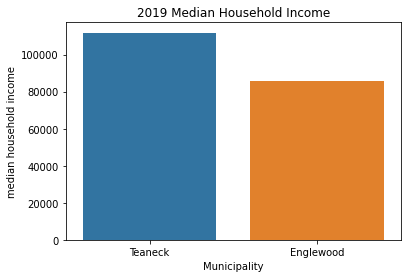

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(y = 'median household income', x = 'Municipality', data = teaneck_vs_englewood).set_title('2019 Median Household Income')

## Result and Discussion <a name="results"></a>

In Teaneck, we visualize a potential area, 400-meter radius from a very popular Thai restaurant. It occupies approximately 3-block away from the restaurant. We recommend this area because it somewhat fits the factors for a desirable location as follows.


*   Teaneck city is the 2nd-highest population density in Bergen county with a significant high median household income.

*   Refer to the data analysis section, there is no occurrence of any competitor in Teaneck. The most common venues imply that apart from mainstream venues, people also love Thai restaurants. This can benefit us as a Thai business.

*   This area connects to Cedar Lane, one of four main commercial districts in Teaneck, and is full of businesses such as restaurants, shops and bars that would be able to guarantee a chance of passing-by customers to spot us.

*   Additionally, there is the availability of public transportation and parking spots around Cedar Lane.

However, at which location of the recommended area, the decision depends on the rent that can fit the budget of the business owner. 


In [ ]:
# get the coordinate of a popular Thai restaurant in Teaneck
geocode_result = geocode(address="445 Cedar Lane, Teaneck, NJ", as_featureset=True)
geocode_result.features

[{"geometry": {"x": -74.02167055477464, "y": 40.88903307956134, "spatialReference": {"wkid": 4326, "latestWkid": 4326}}, "attributes": {"Loc_name": "World", "Status": "M", "Score": 100, "Match_addr": "445 Cedar Ln, Teaneck, New Jersey, 07666", "LongLabel": "445 Cedar Ln, Teaneck, NJ, 07666, USA", "ShortLabel": "445 Cedar Ln", "Addr_type": "PointAddress", "Type": "", "PlaceName": "", "Place_addr": "445 Cedar Ln, Teaneck, New Jersey, 07666", "Phone": "", "URL": "", "Rank": 20, "AddBldg": "", "AddNum": "445", "AddNumFrom": "", "AddNumTo": "", "AddRange": "", "Side": "", "StPreDir": "", "StPreType": "", "StName": "Cedar", "StType": "Ln", "StDir": "", "BldgType": "", "BldgName": "", "LevelType": "", "LevelName": "", "UnitType": "", "UnitName": "", "SubAddr": "", "StAddr": "445 Cedar Ln", "Block": "", "Sector": "", "Nbrhd": "", "District": "", "City": "Teaneck", "MetroArea": "", "Subregion": "Bergen County", "Region": "New Jersey", "RegionAbbr": "NJ", "Territory": "", "Zone": "", "Postal": "

In [ ]:
# Creating the map of a recommended location in Teaneck
teaneck_map = folium.Map(location=[40.88903307956134, -74.02167055477464], zoom_start=16)
folium.Marker([40.88903307956134, -74.02167055477464], popup='Thai Shack').add_to(teaneck_map)
folium.Circle([40.88903307956134, -74.02167055477464], radius=400).add_to(teaneck_map)

teaneck_map

## Conclusion <a name="conclusion"></a>

The project aims to identify a potential location to open a Thai massage and spa in North Jersey region (NJ, USA). As a result, several factors related to deciding on a location for the massage and spa, such as population density, household income, competitors, surrounding businesses, neighborhood ambiance and availability of parking spots, are considered. We utilize data from demographic and spatial websites, ArcGIS API and Foursquare API. 
In the analysis, we start with choosing an interesting county in North Jersey based on the population density and median household income which Bergen county is dominant. Then we explore the cities or boroughs in Bergen, figuring out the 15 most common venues, the similarity of the cities by clustering and, Thai businesses and competitors. These lead us to Teaneck. Eventually, we recommend an area in Cedar Lane, one of four main commercial districts for the business because it meets most of the factors.
